In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [ ]:
# def gray_scale_to_binary(gray):
#     img_temp = gray
#     for i, arr in enumerate(img_temp):
#         img_temp[i] = [1 if val == 0 else 0 for val in arr]
#     return img_temp

In [2]:
filename = 'elephant'

Binary image saved as 'elephant_binary.jpg


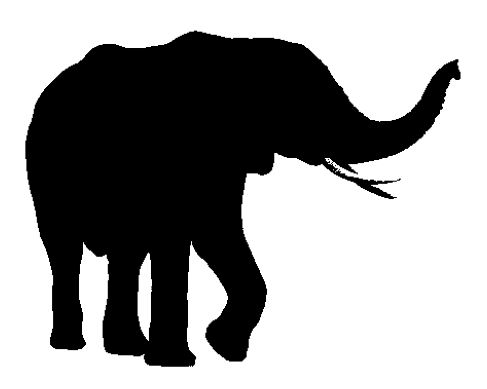

In [3]:
def jpeg_to_binary(image_path, threshold=232):
    # Open the image
    img = Image.open(image_path).convert("L")  # Convert to grayscale

    # Convert to a NumPy array
    img_array = np.array(img)

    # Apply a threshold to create a binary image
    binary_img = (img_array > threshold) * 255

    # Save the resulting binary image
    binary_image_path = filename + '_binary.jpg'
    Image.fromarray(binary_img.astype(np.uint8)).save(binary_image_path)
    print(f"Binary image saved as '{filename}_binary.jpg")

    return binary_img

def display_image(img_array):
    # Display the binary image
    plt.imshow(img_array, cmap='gray')
    plt.axis('off')
    plt.show()

# Specify the path to your JPEG image
image_path = f'{filename}.jpg'

# Convert JPEG to binary image
binary_image = jpeg_to_binary(image_path)

# Display the binary image
display_image(binary_image)

In [4]:
img = cv2.imread(f'{filename}.jpg', cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 220, 255, 0)

In [6]:
for i, arr in enumerate(img):
    img[i] = [1 if val == 0 else 0 for val in arr]
img[len(img) // 2]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

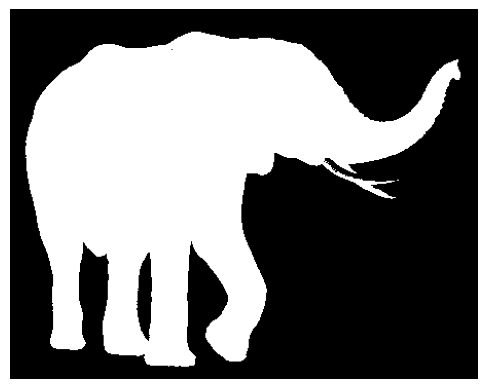

In [7]:
display_image(img)

In [8]:
# img = cv2.imread(f'{filename}_binary.jpg', cv2.IMREAD_GRAYSCALE)
# img = binary_image
# display_image(img)
size = np.size(img)
skel = np.zeros(img.shape, np.uint8)

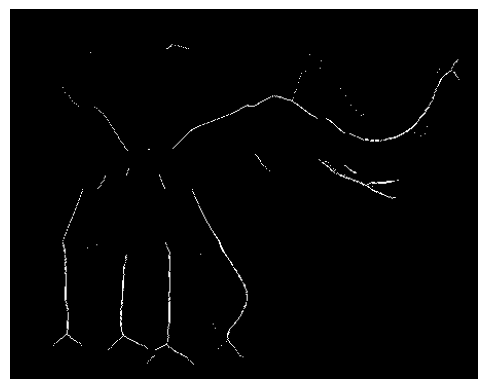

In [9]:
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
done = False
 
# while not done:
for _ in range(100):
    eroded = cv2.erode(img, element)
    temp = cv2.dilate(eroded, element)
    temp = cv2.subtract(img, temp)
    skel = cv2.bitwise_or(skel, temp)
    img = eroded.copy()
    
    zeros = size - cv2.countNonZero(img)
    if zeros == size:
        done = True

display_image(skel)